# Preliminaries

Importing python packages and setting display parameters

In [1]:
import numpy as np
import pandas as pd
import itertools as it

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import thesis_EAfunc as EAf
import thesis_visfunc as EAv

In [2]:
plt.style.use("bmh")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option("display.latex.repr", True)
pd.set_option("display.latex.longtable", True)

# Fitness Landscape Definition

In [ ]:
# Problem domain
x_min = -15
x_max = 15
y_min = -15
y_max = 15

# Known minimum
x_point = -6.01717
y_point = 9.06022

domain = (x_min, x_max, y_min, y_max)
point = (x_point, y_point)
img_size = (8.5, 4.25)

# Problem definition


def g(x, y):
    mag = np.sqrt(x ** 2.0 + y ** 2.0)
    return -(50.0 * np.sinc(mag / np.pi) - mag)


def f(x, y):
    x_min = -6.01717
    y_min = 9.06022
    f_min = (
        g(x_min + 11.0, y_min + 9.0)
        + g(x_min - 11.0, y_min - 3.0)
        + g(x_min + 6.0, y_min - 9.0)
    )
    tripsinc = (
        g(x + 11.0, y + 9.0) + g(x - 11.0, y - 3.0) + g(x + 6.0, y - 9.0) - (f_min)
    )
    return tripsinc

In [4]:
# Testing the minimum
print(f(-6.01717, 9.06022))

0.0


In [ ]:
# Testing the function
print(f(-1.0, -1.0), f(-11.0, -9.0), f(11.0, 3.0), f(-6.0, 9.0))

# Setting up the experiment
6 Experiment
>L-> In each experiment, one factor will be varied through its levels or categories. Other factors stay at default value.
>>L-> 40 Replicate per experiment.
>>>L-> Each replicate is different due to randomness effects.

## Common parameters

In [6]:
# starting seed
np.random.seed(42)

In [7]:
# Algorithm parameters
# Number of replicates, and generations per experiment
rep_n = 40
gen_f = 200

# Population size
pop_s = 20

# Parent subpopulation's selection method and size
par_selection = "fitness_proportional_selection"
b = 3
par_s = b * pop_s

# Progeny subpopulation's and size
prog_s = par_s
# Crossover Method
crossover = "uniform"
# Mutation method, probability and size
mutation = "random_all_gau_dis"
mut_p = 0.5
mut_s = 2.5

# Survivors (New population) selection method
sur_selection = "tournament_k3"

Factor levels

In [ ]:
pop_s_levels = [10, 20, 40, 80, 160]
b_levels = [0.5, 1, 2, 3, 5]
mut_p_levels = [0.1, 0.25, 0.5, 0.75, 0.9]
mut_s_levels = [0.5, 1.25, 2.5, 5, 7.5, 15]
p_sel_levels = [
    "truncation",
    "fitness_proportional_selection",
    "tournament_k3",
    "uniform",
]
s_sel_levels = [
    "truncation",
    "fitness_proportional_selection",
    "tournament_k3",
    "uniform",
]

In [9]:
inputs_labels = {
    "pop_s": "Population size",
    "b": "Progeny-to-population ratio",
    "mut_p": "Mutation Probability",
    "mut_s": "Mutation size",
    "p_sel": "Parent selection",
    "s_sel": "Survivor selection method",
}

p_sel_levels = ["truncation", "fit_proportional", "tourn_k3", "uniform"]
s_sel_levels = ["truncation", "fit_proportional", "tourn_k3", "uniform"]

dat = [
    ("pop_s", "Numerical", pop_s_levels),
    ("b", "Numerical", b_levels),
    ("mut_p", "Numerical (<1)", mut_p_levels),
    ("mut_s", "Numerical", mut_s_levels),
    ("p_sel", "Categorical", p_sel_levels),
    ("s_sel", "Categorical", s_sel_levels),
]

inputs_df = pd.DataFrame(dat, columns=["Factor", "Variable type", "Values"])
inputs_df = inputs_df.set_index(["Factor"])
inputs_df["Label"] = inputs_df.index.map(lambda z: inputs_labels[z])
inputs_df = inputs_df[["Label", "Variable type", "Values"]]

inputs_df

,Label,Variable type,Values
Factor,,,
pop_s,Population size,Numerical,"[10, 20, 40, 80, 160]"
b,Progeny-to-population ratio,Numerical,"[0.5, 1, 2, 3, 5]"
mut_p,Mutation Probability,Numerical (<1),"[0.1, 0.25, 0.5, 0.75, 0.9]"
mut_s,Mutation size,Numerical,"[0.5, 1.25, 2.5, 5, 7.5, 15]"
p_sel,Parent selection,Categorical,"[truncation, fit_proportional, tourn_k3, uniform]"
s_sel,Survivor selection method,Categorical,"[truncation, fit_proportional, tourn_k3, uniform]"


## Initializing data storage

In [10]:
mult_fit_cols = (
    ["exp"]
    + ["pop_s"]
    + ["b"]
    + ["mut_p"]
    + ["mut_s"]
    + ["p_sel"]
    + ["s_sel"]
    + [
        "run",
        "seed",
        "generation",
        "fitness_min",
        "fitness_max",
        "fitness_mean",
        "fitness_std",
    ]
)
multi_fit = pd.DataFrame(columns=mult_fit_cols)
multi_fit = multi_fit.infer_objects()

# Running the experiment

## 1st experiment: Varying population size (Factor pop_s)

### Parameter setting

In [11]:
# Experiment number
exp_n = 1

In [12]:
# Factor levels
pop_s_levels

[10, 20, 40, 80, 160]

### Executing the experiment

In [ ]:
%%time

for level in pop_s_levels:
    pop_s = level

    fitness_res = EAf.EA_exp_only_fitness(
        rep_n,
        gen_f,
        f,
        domain,
        pop_s,
        par_s,
        prog_s,
        mut_p,
        mut_s,
        par_selection,
        crossover,
        mutation,
        sur_selection,
    )
    fitness_res.insert(0, "s_sel", sur_selection)
    fitness_res.insert(0, "p_sel", par_selection)
    fitness_res.insert(0, "mut_s", mut_s)
    fitness_res.insert(0, "mut_p", mut_p)
    fitness_res.insert(0, "b", b)
    fitness_res.insert(0, "pop_s", pop_s)
    fitness_res.insert(0, "exp", exp_n)
    multi_fit = multi_fit.append(fitness_res, ignore_index=True, sort=False)
    multi_fit = multi_fit.infer_objects()

In [13]:
# Resetting the factor to its default value
pop_s = 20

In [14]:
# b = 3
# prog_s = int(b * pop_s)
# par_s = prog_s

## 2nd experiment: Varying progeny-to-population ratio (Factor b)

### Parameter setting

In [15]:
# Experiment number
exp_n = 2

In [16]:
# Factor levels
b_levels

[0.5, 1, 2, 3, 5]

### Executing the experiment

In [ ]:
%%time

for level in b_levels:
    b = level
    prog_s = int(b * pop_s)
    par_s = prog_s

    fitness_res = EAf.EA_exp_only_fitness(
        rep_n,
        gen_f,
        f,
        domain,
        pop_s,
        par_s,
        prog_s,
        mut_p,
        mut_s,
        par_selection,
        crossover,
        mutation,
        sur_selection,
    )

    fitness_res.insert(0, "s_sel", sur_selection)
    fitness_res.insert(0, "p_sel", par_selection)
    fitness_res.insert(0, "mut_s", mut_s)
    fitness_res.insert(0, "mut_p", mut_p)
    fitness_res.insert(0, "b", b)
    fitness_res.insert(0, "pop_s", pop_s)
    fitness_res.insert(0, "exp", exp_n)
    multi_fit = multi_fit.append(fitness_res, ignore_index=True, sort=False)
    multi_fit = multi_fit.infer_objects()

In [17]:
# Resetting the factor to its default value
b = 3
prog_s = int(b * pop_s)
par_s = prog_s

## 3rd experiment: Varying mutation probability (Factor mut_p)

### Parameter setting

In [18]:
# Experiment number
exp_n = 3

In [19]:
# Factor levels
mut_p_levels

[0.1, 0.25, 0.5, 0.75, 0.9]

### Executing the experiment

In [ ]:
%%time

for level in mut_p_levels:
    mut_p = level

    fitness_res = EAf.EA_exp_only_fitness(
        rep_n,
        gen_f,
        f,
        domain,
        pop_s,
        par_s,
        prog_s,
        mut_p,
        mut_s,
        par_selection,
        crossover,
        mutation,
        sur_selection,
    )

    fitness_res.insert(0, "s_sel", sur_selection)
    fitness_res.insert(0, "p_sel", par_selection)
    fitness_res.insert(0, "mut_s", mut_s)
    fitness_res.insert(0, "mut_p", mut_p)
    fitness_res.insert(0, "b", b)
    fitness_res.insert(0, "pop_s", pop_s)
    fitness_res.insert(0, "exp", exp_n)
    multi_fit = multi_fit.append(fitness_res, ignore_index=True, sort=False)
    multi_fit = multi_fit.infer_objects()

In [20]:
# Resetting the factor to its default value
mut_p = 0.5

## 4th experiment: Varying mutation strength (Factor mut_s)

### Parameter setting

In [21]:
# Experiment number
exp_n = 4

In [22]:
# Factor levels
mut_s_levels

[0.5, 1.25, 2.5, 5, 7.5, 15]

### Executing the experiment

In [ ]:
%%time

for level in mut_s_levels:
    mut_s = level

    fitness_res = EAf.EA_exp_only_fitness(
        rep_n,
        gen_f,
        f,
        domain,
        pop_s,
        par_s,
        prog_s,
        mut_p,
        mut_s,
        par_selection,
        crossover,
        mutation,
        sur_selection,
    )

    fitness_res.insert(0, "s_sel", sur_selection)
    fitness_res.insert(0, "p_sel", par_selection)
    fitness_res.insert(0, "mut_s", mut_s)
    fitness_res.insert(0, "mut_p", mut_p)
    fitness_res.insert(0, "b", b)
    fitness_res.insert(0, "pop_s", pop_s)
    fitness_res.insert(0, "exp", exp_n)
    multi_fit = multi_fit.append(fitness_res, ignore_index=True, sort=False)
    multi_fit = multi_fit.infer_objects()

In [23]:
# Resetting the factor to its default value
mut_s = 2.5

## 5th experiment: Varying parent selection (Factor p_sel)

### Parameter setting

In [24]:
# Experiment number
exp_n = 5

In [25]:
# Factor levels
p_sel_levels

['truncation', 'fit_proportional', 'tourn_k3', 'uniform']

### Executing the experiment

In [ ]:
%%time

for level in p_sel_levels:
    par_selection = level

    fitness_res = EAf.EA_exp_only_fitness(
        rep_n,
        gen_f,
        f,
        domain,
        pop_s,
        par_s,
        prog_s,
        mut_p,
        mut_s,
        par_selection,
        crossover,
        mutation,
        sur_selection,
    )

    fitness_res.insert(0, "s_sel", sur_selection)
    fitness_res.insert(0, "p_sel", par_selection)
    fitness_res.insert(0, "mut_s", mut_s)
    fitness_res.insert(0, "mut_p", mut_p)
    fitness_res.insert(0, "b", b)
    fitness_res.insert(0, "pop_s", pop_s)
    fitness_res.insert(0, "exp", exp_n)
    multi_fit = multi_fit.append(fitness_res, ignore_index=True, sort=False)
    multi_fit = multi_fit.infer_objects()

In [26]:
# Resetting the factor to its default value
par_selection = "fitness_proportional_selection"

## 6th experiment: Varying survivors selection (Factor s_sel)

### Parameter setting

In [27]:
# Experiment number
exp_n = 6

In [28]:
# Factor levels
s_sel_levels

['truncation', 'fit_proportional', 'tourn_k3', 'uniform']

### Executing the experiment

In [ ]:
%%time

for level in s_sel_levels:
    sur_selection = level

    fitness_res = EAf.EA_exp_only_fitness(
        rep_n,
        gen_f,
        f,
        domain,
        pop_s,
        par_s,
        prog_s,
        mut_p,
        mut_s,
        par_selection,
        crossover,
        mutation,
        sur_selection,
    )

    fitness_res.insert(0, "s_sel", sur_selection)
    fitness_res.insert(0, "p_sel", par_selection)
    fitness_res.insert(0, "mut_s", mut_s)
    fitness_res.insert(0, "mut_p", mut_p)
    fitness_res.insert(0, "b", b)
    fitness_res.insert(0, "pop_s", pop_s)
    fitness_res.insert(0, "exp", exp_n)
    multi_fit = multi_fit.append(fitness_res, ignore_index=True, sort=False)
    multi_fit = multi_fit.infer_objects()

In [29]:
# Resetting the factor to its default value
sur_selection = "tournament_k3"

## Data storage

Writing the Data Frame to a pickle file

In [ ]:
multi_fit.to_pickle("./Data/TEST_B_OFAT.gz", compression="gzip")

Reading the Data Frame from a pickle file

In [30]:
%%time
multi_fit = pd.read_pickle("./Data/TEST_B_OFAT.gz", compression="gzip")
multi_fit = multi_fit.replace("fitness_proportional_selection", "fitness_proportional")

Wall time: 2.77 s


# Visualization

Factors to iterate in the visualization

In [31]:
factors = ["pop_s"] + ["b"] + ["mut_p"] + ["mut_s"] + ["p_sel"] + ["s_sel"]
factors

['pop_s', 'b', 'mut_p', 'mut_s', 'p_sel', 's_sel']

Development of average minimum (best) fitness for each experiment (Each experiment has one factor at different levels)

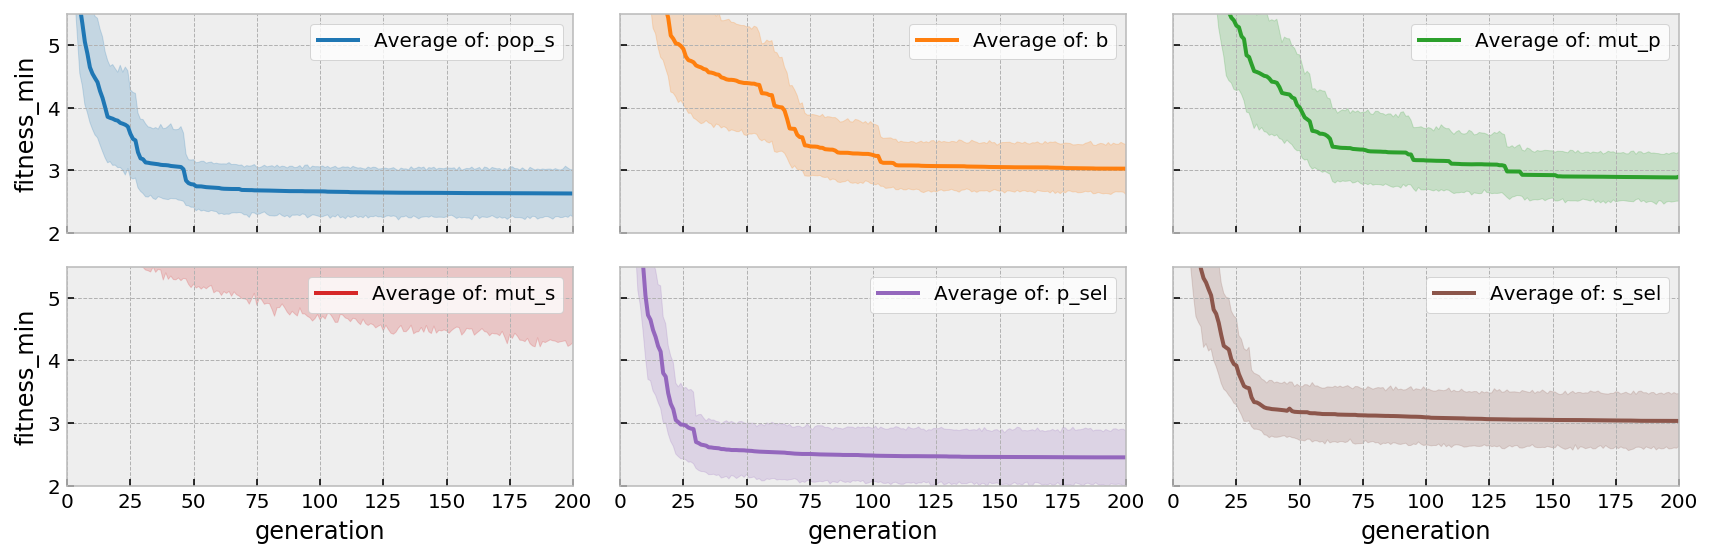

Wall time: 2min 1s


In [32]:
%%time
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 4), sharey=True, sharex=True)
palette = it.cycle(sns.color_palette("tab10"))

for ax, i in zip(axs.flatten(), range(6)):
    query = multi_fit["exp"] == (i + 1)
    c = next(palette)
    sns.lineplot(
        x="generation",
        y="fitness_min",
        label=("Average of: " + factors[i]),
        color=c,
        data=multi_fit[query],
        ax=ax,
    )
    ax.legend(facecolor="white")

axs[0, 0].set_ylim((2, 5.5))
axs[0, 0].set_xlim((0, 200))

plt.tight_layout()
plt.show()

Development of minimum (best) fitness for each level of each experiment

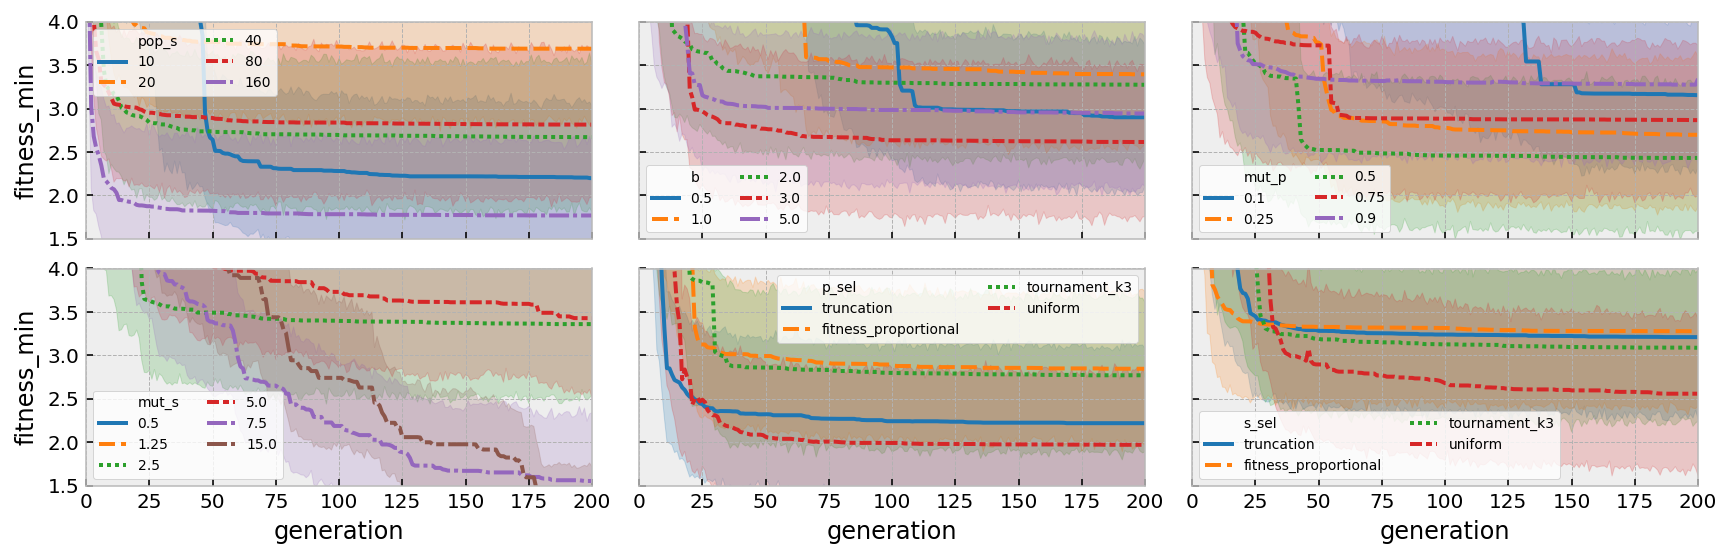

Wall time: 7min 18s


In [33]:
%%time
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 4), sharey=True, sharex=True)

for ax, i in zip(axs.flatten(), range(6)):
    query = multi_fit["exp"] == (i + 1)
    if i in [4, 5]:
        palette = sns.color_palette("tab10", 4)
    elif i == 3:
        palette = sns.color_palette("tab10", 6)
    else:
        palette = sns.color_palette("tab10", 5)
    sns.lineplot(
        x="generation",
        y="fitness_min",
        style=factors[i],
        hue=factors[i],
        palette=palette,
        data=multi_fit[query],
        ax=ax,
    )
    ax.legend(facecolor="white", fontsize="x-small", ncol=2)

axs[0, 0].set_ylim((1.5, 4))
axs[0, 0].set_xlim((0, 200))

plt.tight_layout()
plt.show()

Average of minimum (best) fitness for each level of each experiment at 50, 100 and 200 generations

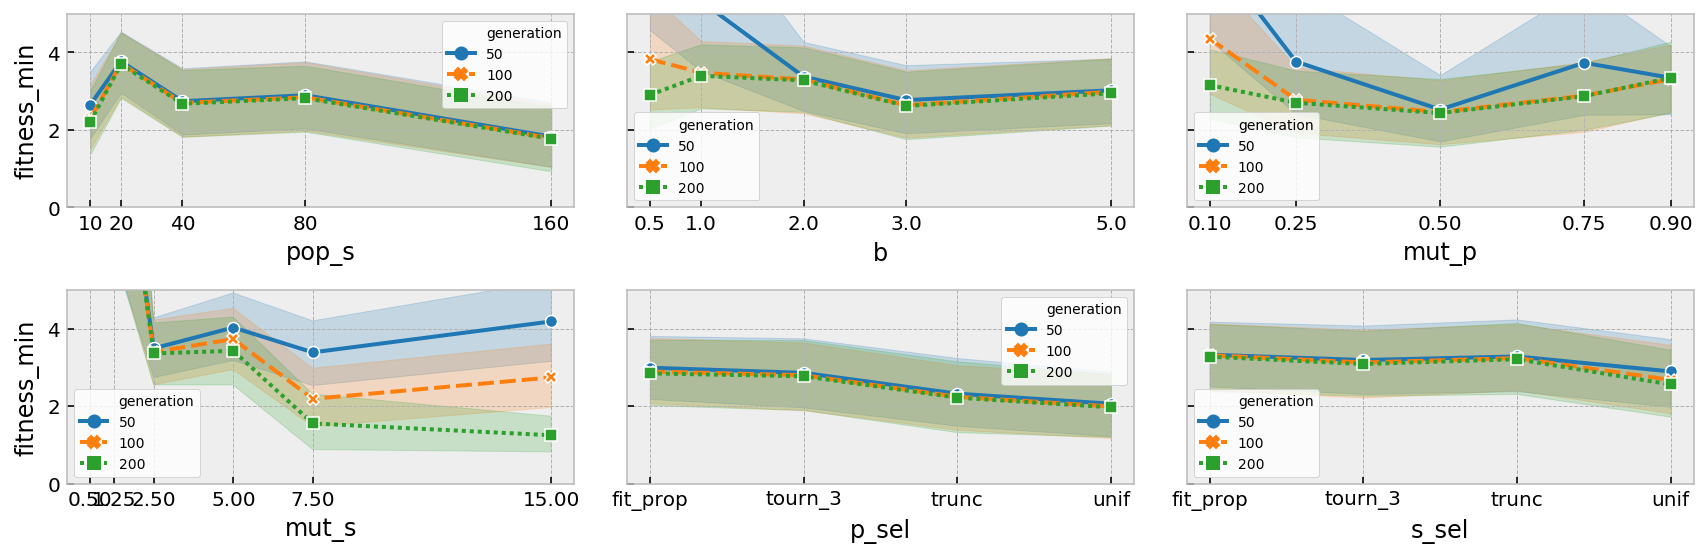

Wall time: 9.36 s


In [34]:
%%time
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 4), sharey=True)

for ax, i in zip(axs.flatten(), range(6)):
    query = (multi_fit["exp"] == (i + 1)) & (
        (multi_fit["generation"] == gen_f)
        | (multi_fit["generation"] == (gen_f - 100))
        | (multi_fit["generation"] == (gen_f - 150))
    )
    palette = sns.color_palette("tab10", 3)
    sns.lineplot(
        x=factors[i],
        y="fitness_min",
        style="generation",
        hue="generation",
        markers=True,
        palette=palette,
        data=multi_fit[query],
        ax=ax,
    )
    ax.legend(facecolor="white", fontsize="x-small")
    if i == 0:
        ax.xaxis.set_ticks(pop_s_levels)
    elif i == 1:
        ax.xaxis.set_ticks(b_levels)
    elif i == 2:
        ax.xaxis.set_ticks(mut_p_levels)
    elif i == 3:
        ax.xaxis.set_ticks(mut_s_levels)
    elif i == 4 or i == 5:
        labels = ["fit_prop", "tourn_3", "trunc", "unif"]
        ax.set_xticklabels(labels)

axs[0, 0].set_ylim((0, 5))

plt.tight_layout()
plt.show()